In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
import seaborn as sns
import numpy as np
import time

# Load the dataset
data = pd.read_csv('cleaned_dataset.csv', delimiter=';', index_col='date')


# Dynamically infer the frequency of the dataset
frequency = pd.infer_freq(data.index)
if frequency:
    data.index.freq = frequency

In [6]:
# Start the timer
start_time = time.time()

# Define the rolling forecast function
def forecaster(train, test, order):
    history = list(train)
    print(history)
    predictions = []
    for t in range(len(test)):
        model = ARIMA(history, order=order)
        model_fit = model.fit()
        predicted_co2 = model_fit.forecast()[0]
        predictions.append(predicted_co2)
        history.append(test[t])
    return predictions

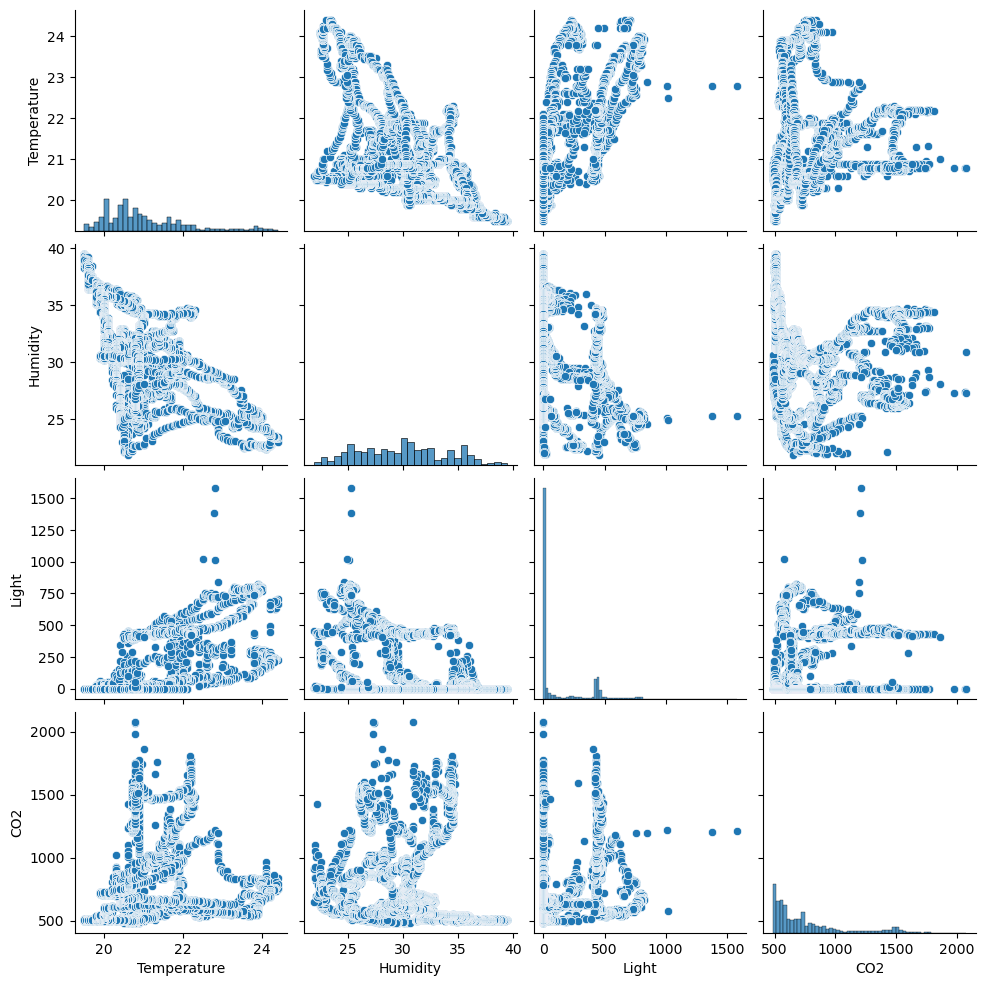

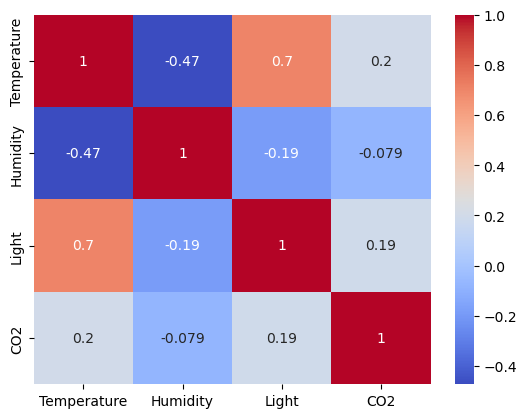

In [7]:
# plotting

sensor_data = data['CO2']
sns.pairplot(data[['Temperature', 'Humidity', 'Light', 'CO2']])
plt.show()
correlation_matrix = data[['Temperature', 'Humidity', 'Light', 'CO2']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [8]:
# Split the data
split_point = int(0.7 * len(sensor_data))
train, test = sensor_data[:split_point], sensor_data[split_point:]

In [9]:
# Check stationarity
adf_result = adfuller(train)
print('ADF Statistic: %f' % adf_result[0])
print('p-value: %f' % adf_result[1])

ADF Statistic: -4.290491
p-value: 0.000461


In [10]:
# Find the best ARIMA model
auto_model = auto_arima(train, seasonal=False, trace=True, error_action='ignore', suppress_warnings=True)
print(auto_model.summary())
order = auto_model.order
forecast = forecaster(train, test, order)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=49131.393, Time=2.32 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=49762.075, Time=0.77 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=49763.443, Time=0.86 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=49763.137, Time=0.97 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=49760.089, Time=0.73 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=49225.327, Time=1.89 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=49155.566, Time=2.05 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=49054.376, Time=2.70 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=49072.044, Time=2.05 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=49025.786, Time=4.41 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=49024.011, Time=3.41 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=49091.862, Time=1.04 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=49025.676, Time=4.25 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=49127.113, Time=0.98 sec
 ARIMA(5,1,0)(0,0,0

C:\Users\Albin\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Albin\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


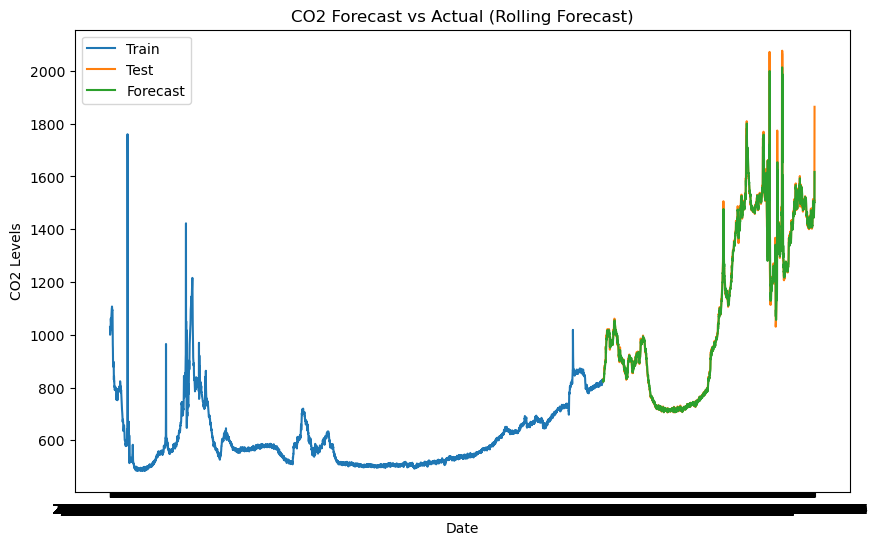

In [11]:
# Plotting the figure for us
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, forecast, label='Forecast')
plt.title('CO2 Forecast vs Actual (Rolling Forecast)')
plt.xlabel('Date')
plt.ylabel('CO2 Levels')
plt.legend()
plt.show()


In [12]:
MAE = np.mean(abs(np.array(forecast) - test)) #Calculating the MAE
print('Mean Absolute Error (MAE):', np.round(MAE, 2))

end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))

Mean Absolute Error (MAE): 11.26
Time taken: 6390.44 seconds
